In [377]:
# !pip install geopandas
# !pip install geopy
# !pip install folium matplotlib mapclassify
# !pip install shapely==2.0a1 --no-binary --user shapely
# !pip install shapely== --user
# !pip install pygeos==0.13 --user
import geopandas as gpd
# gpd.options.use_pygeos=True
gpd.show_versions()


# NotImplementedError: Currently, only PyGEOS >= 0.10.0 or Shapely >= 2.0 supports `nearest_all`.
# To use PyGEOS within GeoPandas, you need to install PyGEOS: 'conda install pygeos' or 'pip install pygeos'


SYSTEM INFO
-----------
python     : 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
executable : C:\Users\ryana\anaconda3\python.exe
machine    : Windows-10-10.0.22621-SP0

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : 3.5.2
GDAL data dir: C:\Users\ryana\anaconda3\lib\site-packages\fiona\gdal_data
PROJ       : 9.1.0
PROJ data dir: C:\Users\ryana\anaconda3\lib\site-packages\pyproj\proj_dir\share\proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.12.0
numpy      : 1.21.5
pandas     : 1.4.4
pyproj     : 3.4.0
shapely    : 1.8.5.post1
fiona      : 1.8.22
geoalchemy2: None
geopy      : 2.2.0
matplotlib : 3.5.2
mapclassify: 2.4.3
pygeos     : None
pyogrio    : None
psycopg2   : None
pyarrow    : None
rtree      : 0.9.7


In [378]:
from IPython.display import Image
from IPython.core.display import HTML 
import os
import pandas as pd
import geopandas as gpd
import rtree
# import pygeos

# gpd.options.use_pygeos = True


[x for x in os.listdir("data/")]

['.DS_Store',
 'BAEA_Nests.dbf',
 'BAEA_Nests.prj',
 'BAEA_Nests.qpj',
 'BAEA_Nests.shp',
 'BAEA_Nests.shx',
 'BAEA_sources.csv',
 'BAEA_surveys.csv',
 'BUOWL_Habitat.cpg',
 'BUOWL_Habitat.dbf',
 'BUOWL_Habitat.prj',
 'BUOWL_Habitat.qpj',
 'BUOWL_Habitat.shp',
 'BUOWL_Habitat.shx',
 'colorado_counties.cpg',
 'colorado_counties.dbf',
 'colorado_counties.prj',
 'colorado_counties.qpj',
 'colorado_counties.shp',
 'colorado_counties.shx',
 'DJBasin.gdb',
 'DJBasin.gpkg',
 'GBH_Rookeries.dbf',
 'GBH_Rookeries.prj',
 'GBH_Rookeries.qpj',
 'GBH_Rookeries.sbn',
 'GBH_Rookeries.sbx',
 'GBH_Rookeries.shp',
 'GBH_Rookeries.shx',
 'intersections.gpkg',
 'Linear_Projects.dbf',
 'Linear_Projects.prj',
 'Linear_Projects.qpj',
 'Linear_Projects.sbn',
 'Linear_Projects.sbx',
 'Linear_Projects.shp',
 'Linear_Projects.shx',
 'Overview.mxd',
 'Overview.qgs',
 'Overview.qgs~',
 'POA_2021_AUST_GDA2020.shp',
 'Raptor_Nests.dbf',
 'Raptor_Nests.prj',
 'Raptor_Nests.qpj',
 'Raptor_Nests.shp',
 'Raptor_Nests.sh

# ! Important - Always use set_geometry after creating a Point/String/Polygon

# Get Lat/Lon from Address

In [379]:
from geopy.geocoders import Nominatim
from geopy import geocoders
from geopy.geocoders import GoogleV3

geolocator = Nominatim(user_agent="test") # Free Version
# geolocator = geocoders.GoogleV3(api_key='') # Paid version

df = pd.DataFrame(['24 Power Street, SouthBank, 3006', '450 Pacific Hwy, St. Leonards, 2065', '325 Nelson Road, Mt. Nelson, 7007', '29 Herbert Street, St. Leonards, 2065'], columns = ['Location'])

d = dict(zip(df["Location"], df["Location"].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))))

print(d)



df_new = pd.DataFrame.from_dict(d, orient='index', columns=["latitude", "longitude"])

df_new["extra"] = "A"

df_new

{'24 Power Street, SouthBank, 3006': (-37.8252667, 144.9646411), '450 Pacific Hwy, St. Leonards, 2065': (-33.8232751, 151.1949828), '325 Nelson Road, Mt. Nelson, 7007': (-42.9118129, 147.3226418), '29 Herbert Street, St. Leonards, 2065': (-33.822616, 151.1935314)}


,latitude,longitude,extra
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A


# Importing a File

In [380]:
# Import shape file

#Error while opening .shp file. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.
# Fix this issue, after little more understanding the .shp objects.
# Solution is to have all other relevant files that come along with .sho file in one folder!

# Ex.
# v2W2.shp
# v2W2.prj
# v2W2.dbf
# v2W2.shx




polygon = gpd.read_file("data/BUOWL_Habitat.shp", encoding="utf-8")
polygon


,postgis_fi,habitat,hist_occup,recentstat,habitat_id,active2017,geometry
0,15.0,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,FALSE,"POLYGON ((-104.61687 40.16775, -104.61676 40.1..."
1,41.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,FALSE,"POLYGON ((-104.65030 40.14220, -104.65014 40.1..."
2,42.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,FALSE,"POLYGON ((-104.59917 40.11202, -104.59902 40.1..."
3,43.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,FALSE,"POLYGON ((-104.69383 40.17870, -104.69360 40.1..."
4,54.0,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,FALSE,"POLYGON ((-104.68393 40.19921, -104.68402 40.1..."
...,...,...,...,...,...,...,...
468,447.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,447,FALSE,"POLYGON ((-104.40336 40.46377, -104.40423 40.4..."
469,449.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,449,FALSE,"POLYGON ((-104.38712 40.47787, -104.38716 40.4..."
470,461.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,461,FALSE,"POLYGON ((-104.39052 40.40576, -104.39108 40.4..."
471,486.0,sdafdfadfa,Yes,ACTIVE NEST,486,FALSE,"POLYGON ((-105.08032 40.01568, -105.07959 40.0..."


In [381]:
# Import GeoJson file

polygon_geo = gpd.read_file("data/wildlife_buowl.geojson", encoding="utf-8")
polygon_geo

,postgis_fid,habitat,hist_occup,recentstatus,habitat_id,geometry
0,15,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,"MULTIPOLYGON (((-104.61687 40.16775, -104.6167..."
1,41,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,"MULTIPOLYGON (((-104.65030 40.14220, -104.6501..."
2,42,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,"MULTIPOLYGON (((-104.59917 40.11202, -104.5990..."
3,43,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,"MULTIPOLYGON (((-104.69383 40.17870, -104.6936..."
4,54,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,"MULTIPOLYGON (((-104.68393 40.19921, -104.6840..."
...,...,...,...,...,...,...
468,447,Active Prairie Dog Colony,Yes,ACTIVE NEST,447,"MULTIPOLYGON (((-104.40336 40.46377, -104.4042..."
469,449,Active Prairie Dog Colony,Yes,ACTIVE NEST,449,"MULTIPOLYGON (((-104.38712 40.47787, -104.3871..."
470,461,Active Prairie Dog Colony,Yes,ACTIVE NEST,461,"MULTIPOLYGON (((-104.39052 40.40576, -104.3910..."
471,486,sdafdfadfa,Yes,ACTIVE NEST,486,"MULTIPOLYGON (((-105.08032 40.01568, -105.0817..."


# Points, Line and Polygons

### What is crs and what to use

A CRS tells Python how coordinates relate to places on Earth. 

4326 is the most common in USA - where as 7844 is what's used in Australia

### How to create a GeoDataFrame from a Normal Pandas DataFrame

A GeoDataFrame has to have a Shapely Object (Series), therefore if all there is, is lat/lon data then these need to be converted into 'Points'.

There can only be one Series that is a geo datatype!

Or you can do it in one step like so:

gdf = gpd.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [382]:
# How to create a Point from geo_coords

df_new["geo"] = gpd.points_from_xy(df_new.longitude, df_new.latitude, crs="EPSG:7844")

df_new

,latitude,longitude,extra,geo
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527)
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328)
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181)
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262)


In [383]:
# How to get the Lat/Long from a Point
# Dataframe must be a GeoDataFrame first!
# Longitude is x, latitude is y

df_new = gpd.GeoDataFrame(df_new, crs="EPSG:7844", geometry="geo")

df_new["lon_from_point"] = df_new.geo.apply(lambda p: p.x)
df_new["lat_from_point"] = df_new.geo.apply(lambda p: p.y)


df_new

,latitude,longitude,extra,geo,lon_from_point,lat_from_point
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616


In [384]:
# How to create a Multi-Point from points
from shapely.geometry import MultiPoint, Point

df_new["geo2"] = df_new["geo"].translate(xoff=0.1, yoff=0.0, )
df_new["multi_point"] = [MultiPoint([x,y]) for x, y in zip(df_new.geo, df_new.geo2)]

df_new = df_new.set_geometry('multi_point', crs="EPSG:7844")

df_new

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37..."
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33..."
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42..."
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33..."


In [385]:
# How to create a Line from points
from shapely.geometry import LineString


df_new['line'] = df_new.apply(lambda row: LineString([row['geo'], row['geo2']]), axis=1) 
df_new = df_new.set_geometry('line', crs="EPSG:7844")

df_new

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37..."
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33..."
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42..."
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33..."


In [386]:
# How to create a Multi-Line from points

from shapely.geometry import MultiLineString



df_new["line2"] = df_new["line"].translate(xoff=0.001, yoff=0.0)
df_new["multiline"] = [MultiLineString([x,y]) for x, y in zip(df_new.line, df_new.line2)]

df_new = df_new.set_geometry('multiline', crs="EPSG:7844")

df_new

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,multiline
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...","MULTILINESTRING ((144.96464 -37.82527, 145.064..."
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...","MULTILINESTRING ((151.19498 -33.82328, 151.294..."
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...","MULTILINESTRING ((147.32264 -42.91181, 147.422..."
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...","MULTILINESTRING ((151.19353 -33.82262, 151.293..."


In [387]:
# How to create a Polygon from Points - with columns
from shapely.geometry import Polygon

df_new["geo3"] = df_new["geo2"].translate(xoff=0.1, yoff=0.1 )
df_new["geo4"] = df_new["geo3"].translate(xoff=0.1, yoff=0.1 )


def poly(col):
    one = col["geo"]
    two = col["geo2"]
    three = col["geo3"]
    four = col["geo4"]
    
    return Polygon([[one.x, one.y], [two.x, two.y], [three.x, three.y], [four.x, four.y]])
    
    
df_new["col_test"] = df_new.apply(lambda row: poly(row), axis=1)
df_new = df_new.set_geometry('col_test', crs="EPSG:7844")


df_new[["latitude", "longitude", "col_test"]].explore()

In [388]:
# How to create a Polygon from Points - with rows
from shapely.geometry import Polygon
import numpy as np

# Need to have the first and last coordinate in the list close off the Polygon

lat_list = np.append(df_new["geo"].y.values, df_new["geo"].y.values[-2])
lon_list = np.append(df_new["geo"].x.values, df_new["geo"].x.values[-2]) 

df_new["row_test"] = Polygon(zip(lon_list, lat_list))
df_new = df_new.set_geometry('row_test', crs="EPSG:7844")

df_new
df_new[["latitude", "longitude", "row_test"]].explore()



In [389]:
# How to create a Polygon from Lines

df_new["line"].iloc[0].coords.xy[0]



array('d', [144.9646411, 145.0646411])

In [390]:
# How to create a Multi_polygon from Polygons
from shapely.geometry import MultiPolygon


def multi_pol(col):
    one = col["col_test"]
    two = col["row_test"]
    return MultiPolygon([one, two])


df_new["multi_pol"] = df_new.apply(lambda row: multi_pol(row), axis=1)
df_new = df_new.set_geometry('multi_pol', crs="EPSG:7844")

df_new

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,multiline,geo3,geo4,col_test,row_test,multi_pol
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...","MULTILINESTRING ((144.96464 -37.82527, 145.064...",POINT (145.16464 -37.72527),POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464..."
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...","MULTILINESTRING ((151.19498 -33.82328, 151.294...",POINT (151.39498 -33.72328),POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498..."
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...","MULTILINESTRING ((147.32264 -42.91181, 147.422...",POINT (147.52264 -42.81181),POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264..."
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...","MULTILINESTRING ((151.19353 -33.82262, 151.293...",POINT (151.39353 -33.72262),POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353..."


In [391]:
# How to determine the distance between 2 points


from math import radians, cos, sin, asin, sqrt

# def haversine(lon1, lat1, lon2, lat2):
def haversine(col):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lon1 = col["geo"].x
    lon2 = col["geo2"].x
    lat1 = col["geo"].y
    lat2 = col["geo2"].y
    
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in miles. Use 6371 for kilometers
    return c * r




df_new["distance_between_points"] = df_new.apply(lambda row: haversine(row), axis=1)

df_new

,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,multiline,geo3,geo4,col_test,row_test,multi_pol,distance_between_points
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...","MULTILINESTRING ((144.96464 -37.82527, 145.064...",POINT (145.16464 -37.72527),POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...","MULTILINESTRING ((151.19498 -33.82328, 151.294...",POINT (151.39498 -33.72328),POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...","MULTILINESTRING ((147.32264 -42.91181, 147.422...",POINT (147.52264 -42.81181),POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...","MULTILINESTRING ((151.19353 -33.82262, 151.293...",POINT (151.39353 -33.72262),POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683


In [392]:
from geopy import distance

def calc_distance(col):
    return distance.distance((col["geo"].y, col["geo"].x), (col["geo2"].y, col["geo2"].x)).km


df_new["distance_between_points_geopy"] = df_new.apply(lambda row: calc_distance(row), axis=1)

df_new

,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,multiline,geo3,geo4,col_test,row_test,multi_pol,distance_between_points,distance_between_points_geopy
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...","MULTILINESTRING ((144.96464 -37.82527, 145.064...",POINT (145.16464 -37.72527),POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116,8.804045
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...","MULTILINESTRING ((151.19498 -33.82328, 151.294...",POINT (151.39498 -33.72328),POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612,9.257566
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...","MULTILINESTRING ((147.32264 -42.91181, 147.422...",POINT (147.52264 -42.81181),POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944,8.165748
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...","MULTILINESTRING ((151.19353 -33.82262, 151.293...",POINT (151.39353 -33.72262),POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683,9.257637


In [393]:
# How to determine the distance of a line

from pyproj import Geod

def line_length(col):
    
    line = col["line"]
    geod = Geod(ellps="WGS84")
    return geod.geometry_length(line)



df_new["line_length_m"] = df_new.apply(lambda row: line_length(row), axis=1)

df_new



,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,multiline,geo3,geo4,col_test,row_test,multi_pol,distance_between_points,distance_between_points_geopy,line_length_m
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...","MULTILINESTRING ((144.96464 -37.82527, 145.064...",POINT (145.16464 -37.72527),POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116,8.804045,8804.044980
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...","MULTILINESTRING ((151.19498 -33.82328, 151.294...",POINT (151.39498 -33.72328),POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612,9.257566,9257.566004
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...","MULTILINESTRING ((147.32264 -42.91181, 147.422...",POINT (147.52264 -42.81181),POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944,8.165748,8165.747996
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...","MULTILINESTRING ((151.19353 -33.82262, 151.293...",POINT (151.39353 -33.72262),POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683,9.257637,9257.637028


In [394]:
# How to determine the mid point of the line

# https://gis.stackexchange.com/questions/401311/creating-linestring-from-two-points-and-finding-mid-point

df_new['midpoint'] = df_new.apply(lambda row: row['line'].centroid, axis=1) #Find centroid

df_new

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,multiline,geo3,geo4,col_test,row_test,multi_pol,distance_between_points,distance_between_points_geopy,line_length_m,midpoint
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...","MULTILINESTRING ((144.96464 -37.82527, 145.064...",POINT (145.16464 -37.72527),POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116,8.804045,8804.044980,POINT (145.01464 -37.82527)
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...","MULTILINESTRING ((151.19498 -33.82328, 151.294...",POINT (151.39498 -33.72328),POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612,9.257566,9257.566004,POINT (151.24498 -33.82328)
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...","MULTILINESTRING ((147.32264 -42.91181, 147.422...",POINT (147.52264 -42.81181),POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944,8.165748,8165.747996,POINT (147.37264 -42.91181)
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...","MULTILINESTRING ((151.19353 -33.82262, 151.293...",POINT (151.39353 -33.72262),POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683,9.257637,9257.637028,POINT (151.24353 -33.82262)


In [395]:
# How to determine the perimeter length of a polygon

from pyproj import Geod

def poly_perimeter(col):
    
    poly = col["row_test"]
    geod = Geod(ellps="WGS84")
    return geod.geometry_length(poly)



df_new["poly_perimeter_m"] = df_new.apply(lambda row: poly_perimeter(row), axis=1)

df_new

,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,...,geo3,geo4,col_test,row_test,multi_pol,distance_between_points,distance_between_points_geopy,line_length_m,midpoint,poly_perimeter_m
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...",...,POINT (145.16464 -37.72527),POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116,8.804045,8804.044980,POINT (145.01464 -37.82527),4.507319e+06
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...",...,POINT (151.39498 -33.72328),POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612,9.257566,9257.566004,POINT (151.24498 -33.82328),4.507319e+06
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...",...,POINT (147.52264 -42.81181),POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944,8.165748,8165.747996,POINT (147.37264 -42.91181),4.507319e+06
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...",...,POINT (151.39353 -33.72262),POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683,9.257637,9257.637028,POINT (151.24353 -33.82262),4.507319e+06


In [396]:
# How to determine the area of a polygon
from pyproj import Geod


def poly_area(col):
    poly = col["col_test"]
    geod = Geod(ellps="WGS84")
    poly_area, poly_perimeter = geod.geometry_area_perimeter(poly)
    return poly_area

df_new["polygon_area_m"] = df_new.apply(lambda row: poly_area(row), axis=1)

df_new

,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,...,geo4,col_test,row_test,multi_pol,distance_between_points,distance_between_points_geopy,line_length_m,midpoint,poly_perimeter_m,polygon_area_m
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...",...,POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116,8.804045,8804.044980,POINT (145.01464 -37.82527),4.507319e+06,9.741894e+07
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...",...,POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612,9.257566,9257.566004,POINT (151.24498 -33.82328),4.507319e+06,1.023961e+08
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...",...,POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944,8.165748,8165.747996,POINT (147.37264 -42.91181),4.507319e+06,9.040676e+07
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...",...,POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683,9.257637,9257.637028,POINT (151.24353 -33.82262),4.507319e+06,1.023969e+08


In [397]:
# How to create a Bounding Box around a GeoSeries (polygon)
from shapely.geometry import box

df_new["bounding_box"] = df_new.apply(lambda row: box(*row["col_test"].bounds), axis=1)
df_new = df_new.set_geometry('bounding_box', crs="EPSG:7844")

df_new

,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,...,col_test,row_test,multi_pol,distance_between_points,distance_between_points_geopy,line_length_m,midpoint,poly_perimeter_m,polygon_area_m,bounding_box
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...",...,"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116,8.804045,8804.044980,POINT (145.01464 -37.82527),4.507319e+06,9.741894e+07,"POLYGON ((145.26464 -37.82527, 145.26464 -37.6..."
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...",...,"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612,9.257566,9257.566004,POINT (151.24498 -33.82328),4.507319e+06,1.023961e+08,"POLYGON ((151.49498 -33.82328, 151.49498 -33.6..."
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...",...,"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944,8.165748,8165.747996,POINT (147.37264 -42.91181),4.507319e+06,9.040676e+07,"POLYGON ((147.62264 -42.91181, 147.62264 -42.7..."
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...",...,"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683,9.257637,9257.637028,POINT (151.24353 -33.82262),4.507319e+06,1.023969e+08,"POLYGON ((151.49353 -33.82262, 151.49353 -33.6..."


# Visualisation

<AxesSubplot:>

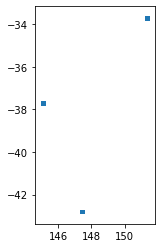

In [398]:
# Simple plot
df_new.plot()

In [399]:
# Explore plot
# The 'folium', 'matplotlib' and 'mapclassify' packages are required for 'explore()'
# To activate explore mode 'pip install folium matplotlib mapclassify'

df_new = df_new.set_geometry('bounding_box', crs="EPSG:7844") # Make sure you set the geometry you want to render first

df_new[["latitude", "longitude", "bounding_box"]].explore()

# Constructive Methods 
## On a Series

In [400]:
# Buffer - expand the polygon's radius by a distance

# The approximate conversions are: Latitude: 1 deg = 110.574 km. Longitude: 1 deg = 111.320*cos(latitude) km.


df_new["buffer"] = df_new.apply(lambda row: row["col_test"].buffer(distance=0.1), axis=1)

df_new = df_new.set_geometry('buffer', crs="EPSG:7844")



df_new[["latitude", "longitude", "buffer"]].explore()


In [401]:
# Boundary - Returns a line of the polygon boundary

df_new["boundary_line"] = df_new.apply(lambda row: row["buffer"].boundary, axis=1)

df_new = df_new.set_geometry('boundary_line', crs="EPSG:7844")



df_new[["latitude", "longitude", "boundary_line"]].explore()

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [402]:
# Centroid - Returns the middle of the polygon

df_new["centroid"] = df_new.apply(lambda row: row["buffer"].centroid, axis=1)

df_new = df_new.set_geometry('centroid', crs="EPSG:7844")



df_new[["latitude", "longitude", "centroid"]].explore()

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [403]:
# convex_hull - Returns the smallest polygon containing all the points in each object
# (good for developing polygons from points?)

df_new["convex_hull"] = df_new.apply(lambda row: row["buffer"].convex_hull, axis=1)

df_new = df_new.set_geometry('convex_hull', crs="EPSG:7844")



df_new[["latitude", "longitude", "convex_hull"]].explore()

In [404]:
# Envelope - Returns the smallest rectangle polygon

df_new["envelope"] = df_new.apply(lambda row: row["buffer"].envelope, axis=1)

df_new = df_new.set_geometry('envelope', crs="EPSG:7844")



df_new[["latitude", "longitude", "envelope"]].explore()

In [405]:
# Unary_Union - Creates a multi-polygon from a seires of polygons (Can have space between polygons)

un_union = df_new["envelope"].unary_union

print(un_union)

MULTIPOLYGON (((147.72264179610966 -42.61181293501298, 147.72264179610966 -43.0118129, 147.22264182071777 -43.0118129, 147.22264182071777 -42.61181293501298, 147.72264179610966 -42.61181293501298)), ((145.36464109610964 -37.52526673501298, 145.36464109610964 -37.9252667, 144.86464112071775 -37.9252667, 144.86464112071775 -37.52526673501298, 145.36464109610964 -37.52526673501298)), ((151.59498279610963 -33.9232751, 151.09498282071775 -33.9232751, 151.09498282071775 -33.922616, 151.09353142071777 -33.922616, 151.09353142071777 -33.52261603501297, 151.59353139610965 -33.52261603501297, 151.59353139610965 -33.52327513501297, 151.59498279610963 -33.52327513501297, 151.59498279610963 -33.9232751)))


# Affine Transformations
## On a Series

In [406]:
# Scale - Increase the size of a line/polygon across the x,y,z axis

df_new["envelope_scaled"] = df_new["envelope"].scale(xfact=2.0, yfact=2.0, zfact=1.0, origin='center')

df_new = df_new.set_geometry('envelope_scaled', crs="EPSG:7844")


df_new[["latitude", "longitude", "envelope_scaled"]].explore()

In [407]:
# Translate - Shift (Offset) the coordinates of the polygon by latitude/longitude measurements

df_new["envelope_shifted"] = df_new["envelope"].translate(xoff=0.1, yoff=0.0, zoff=0.0)

df_new = df_new.set_geometry('envelope_shifted', crs="EPSG:7844")


df_new[["latitude", "longitude", "envelope_shifted"]].explore()

# Set-Operations
## Overlay

![Image](https://geopandas.org/en/stable/_images/overlay_operations.png)

In [408]:
# Intersection - When 2 polygons run into each other you can create a new polygon with the intersection

poly_1 = df_new[["envelope", "extra"]].set_geometry('envelope', crs="EPSG:7844")
poly_2 = df_new[["envelope_shifted", "extra"]].set_geometry('envelope_shifted', crs="EPSG:7844")

poly_3 = poly_1.overlay(poly_2, how='intersection')

poly_3.explore()

In [409]:
# Union - Group 2 Polygons together to create 1 large polygon (with lining)
# See disolve to remove lining from original polygons

poly_1 = df_new[["envelope", "extra"]].set_geometry('envelope', crs="EPSG:7844")
poly_2 = df_new[["envelope_shifted", "extra"]].set_geometry('envelope_shifted', crs="EPSG:7844")

poly_3 = poly_1.overlay(poly_2, how='union')

poly_3.explore()

In [410]:
# Symetrical Difference - Include everything except for what is shared between polygons

poly_1 = df_new[["envelope", "extra"]].set_geometry('envelope', crs="EPSG:7844")
poly_2 = df_new[["envelope_shifted", "extra"]].set_geometry('envelope_shifted', crs="EPSG:7844")

poly_3 = poly_1.overlay(poly_2, how='symmetric_difference')

poly_3.explore()

In [411]:
# Difference - Return 1 of 2 Polygons minus any sharing

poly_1 = df_new[["envelope", "extra"]].set_geometry('envelope', crs="EPSG:7844")
poly_2 = df_new[["envelope_shifted", "extra"]].set_geometry('envelope_shifted', crs="EPSG:7844")

poly_3 = poly_1.overlay(poly_2, how='difference')

poly_3.explore()

# Joins

In [412]:
# Attribute Joins - Same as normal pandas merge join (bring more no spatial fields into a GeoDataFrame)

attr_join = poly_1.merge(poly_2, on="extra")
attr_join

,envelope,extra,envelope_shifted
0,"POLYGON ((144.86464 -37.92527, 145.36464 -37.9...",A,"POLYGON ((144.96464 -37.92527, 145.46464 -37.9..."
1,"POLYGON ((144.86464 -37.92527, 145.36464 -37.9...",A,"POLYGON ((151.19498 -33.92328, 151.69498 -33.9..."
2,"POLYGON ((144.86464 -37.92527, 145.36464 -37.9...",A,"POLYGON ((147.32264 -43.01181, 147.82264 -43.0..."
3,"POLYGON ((144.86464 -37.92527, 145.36464 -37.9...",A,"POLYGON ((151.19353 -33.92262, 151.69353 -33.9..."
4,"POLYGON ((151.09498 -33.92328, 151.59498 -33.9...",A,"POLYGON ((144.96464 -37.92527, 145.46464 -37.9..."
5,"POLYGON ((151.09498 -33.92328, 151.59498 -33.9...",A,"POLYGON ((151.19498 -33.92328, 151.69498 -33.9..."
6,"POLYGON ((151.09498 -33.92328, 151.59498 -33.9...",A,"POLYGON ((147.32264 -43.01181, 147.82264 -43.0..."
7,"POLYGON ((151.09498 -33.92328, 151.59498 -33.9...",A,"POLYGON ((151.19353 -33.92262, 151.69353 -33.9..."
8,"POLYGON ((147.22264 -43.01181, 147.72264 -43.0...",A,"POLYGON ((144.96464 -37.92527, 145.46464 -37.9..."
9,"POLYGON ((147.22264 -43.01181, 147.72264 -43.0...",A,"POLYGON ((151.19498 -33.92328, 151.69498 -33.9..."


In [413]:
# Spatial Join - Determine if a point/line falls withiin a polygon using a join

point_ = df_new[["geo", "extra"]].iloc[0:1,:].set_geometry('geo', crs="EPSG:7844")
point_["match"] = "match"

point_

polygon = df_new[["envelope", "extra"]].set_geometry('envelope', crs="EPSG:7844")

polygon

spatial_join_df = polygon.sjoin(point_, how="left", predicate='intersects')

spatial_join_df

,envelope,extra_left,index_right,extra_right,match
"24 Power Street, SouthBank, 3006","POLYGON ((144.86464 -37.92527, 145.36464 -37.9...",A,"24 Power Street, SouthBank, 3006",A,match
"450 Pacific Hwy, St. Leonards, 2065","POLYGON ((151.09498 -33.92328, 151.59498 -33.9...",A,NaN,NaN,NaN
"325 Nelson Road, Mt. Nelson, 7007","POLYGON ((147.22264 -43.01181, 147.72264 -43.0...",A,NaN,NaN,NaN
"29 Herbert Street, St. Leonards, 2065","POLYGON ((151.09353 -33.92262, 151.59353 -33.9...",A,NaN,NaN,NaN


In [414]:
# Nearest Joins
# Proximity-based joins can be done via GeoDataFrame.sjoin_nearest().

point_ = df_new[["geo", "extra"]].set_geometry('geo', crs="EPSG:7844")
point_["match"] = "match"

point_

polygon = df_new[["envelope", "extra"]].iloc[1:2,].set_geometry('envelope', crs="EPSG:7844")

polygon

nearest_points = polygon.sjoin_nearest(point_, max_distance=1.0)

nearest_points

C:\Users\ryana\anaconda3\lib\site-packages\geopandas\array.py:344: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


NotImplementedError: Currently, only PyGEOS >= 0.10.0 or Shapely >= 2.0 supports `nearest_all`. To use PyGEOS within GeoPandas, you need to install PyGEOS: 'conda install pygeos' or 'pip install pygeos'

# Aggregation

In [415]:
# Disolve - After a union, group all the polygon together without the original outline
# There is an aggfunc param which allows you to apply a measure as you group all the polygons together
# .dissolve(by='continent', aggfunc='sum')

spatial_join_df["number"] = 30

agg = spatial_join_df.dissolve(by=['extra_left'], aggfunc='sum')

agg

,envelope,number
extra_left,,
A,"MULTIPOLYGON (((147.72264 -42.61181, 147.72264...",120


In [416]:
agg.explore()

# Exporting

In [417]:
import fiona
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [421]:
# To Shape file
df_new["latitude"] = df_new["latitude"].astype(str)
df_new["longitude"] = df_new["longitude"].astype(str)

shape_df = df_new[["latitude", "longitude", "envelope"]].set_geometry('envelope', crs="EPSG:7844") 

shape_df.to_file('shape_file.shp', crs="EPSG:7844")
shape_df

,latitude,longitude,envelope
"24 Power Street, SouthBank, 3006",-37.8252667,144.9646411,"POLYGON ((144.86464 -37.92527, 145.36464 -37.9..."
"450 Pacific Hwy, St. Leonards, 2065",-33.8232751,151.1949828,"POLYGON ((151.09498 -33.92328, 151.59498 -33.9..."
"325 Nelson Road, Mt. Nelson, 7007",-42.9118129,147.3226418,"POLYGON ((147.22264 -43.01181, 147.72264 -43.0..."
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.1935314,"POLYGON ((151.09353 -33.92262, 151.59353 -33.9..."


In [422]:
# To GeoJson

shape_df = df_new[["latitude", "longitude", "envelope"]].set_geometry('envelope', crs="EPSG:7844") 

shape_df.to_file('shape_file.geojson', crs="EPSG:7844", driver="GeoJSON")
shape_df

,latitude,longitude,envelope
"24 Power Street, SouthBank, 3006",-37.8252667,144.9646411,"POLYGON ((144.86464 -37.92527, 145.36464 -37.9..."
"450 Pacific Hwy, St. Leonards, 2065",-33.8232751,151.1949828,"POLYGON ((151.09498 -33.92328, 151.59498 -33.9..."
"325 Nelson Road, Mt. Nelson, 7007",-42.9118129,147.3226418,"POLYGON ((147.22264 -43.01181, 147.72264 -43.0..."
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.1935314,"POLYGON ((151.09353 -33.92262, 151.59353 -33.9..."


In [ ]:
# Convert Shape file to GeoJson

polygon.to_file('myshpfile.geojson', driver='GeoJSON')
df = gpd.read_file('myshpfile.geojson')
df